In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import requests
from io import BytesIO
from PIL import Image
import ast

In [8]:
annotations_results = pd.read_csv("data/Batch_4041660_batch_results.csv")

color = {"car":"#cd3232", "truck": "#32cd32", "bus": "#3c32cd", "motercycle": "#cd32c8", "cycle":"#74d3d6"}

100% (1/1)


FileNotFoundError: [Errno 2] No such file or directory: 'output/1_2295_100% (1/1).jpg'

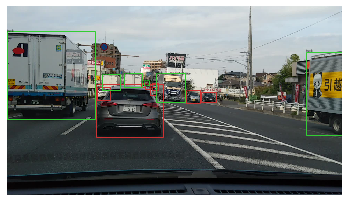

In [10]:
for i, each in annotations_results.iterrows():
    image_url = requests.get(each["Input.image_url"])
    img = Image.open(BytesIO(image_url.content))
    im = np.array(img, dtype=np.uint8)
    
    hit_id = each["HITId"]
    work_time = each["WorkTimeInSeconds"]
    approval_rate = each["LifetimeApprovalRate"]
    print(approval_rate)
    
    worker_answer = each["Answer.annotatedResult.boundingBoxes"]
    
    fig,ax = plt.subplots(1)
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(im)

    # Here we are using ast.literal_eval because the results are in string format
    for answer in ast.literal_eval(worker_answer):
        rect = patches.Rectangle((answer['left'],answer['top']),answer['width'],answer['height'],linewidth=1,edgecolor=color[answer["label"]],facecolor='none')
        ax.text(answer['left'],answer['top'], answer["label"], fontsize=3)
        ax.add_patch(rect)
    # Save the bounding box with images
    plt.savefig(f"output/{i+1}_{work_time}_{approval_rate}.jpg", dpi = 600, bbox_inches='tight')    
    plt.close()